In [1]:
import numpy as np
import matplotlib.pyplot as plt
def lg_plot(clf):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.show()

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver='lbfgs')
rnd_clf = RandomForestClassifier(n_estimators=100)
svm_clf = SVC(gamma=5, probability=True)

# 软投票
voting_clf = VotingClassifier(
                estimators=[('l', log_clf),('r', rnd_clf),('s', svm_clf)],
                voting='soft')


# 卫星数据
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=500, noise=0.15, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y)

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.896
RandomForestClassifier 0.968
SVC 0.984
VotingClassifier 0.968


In [3]:
# DecisionTree with bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


bag_clf = BaggingClassifier(
            DecisionTreeClassifier(), n_estimators=500,
            max_samples=100, bootstrap=True, n_jobs=-1,
            oob_score=True)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print(bag_clf.oob_score_)
print(accuracy_score(y_test, y_pred))

0.9786666666666667
0.976


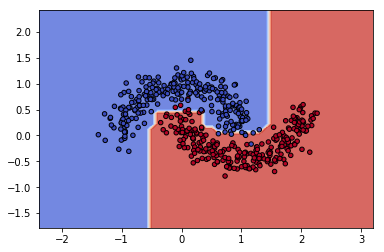

In [4]:
lg_plot(bag_clf)

In [5]:
# 随机森林

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))

0.968


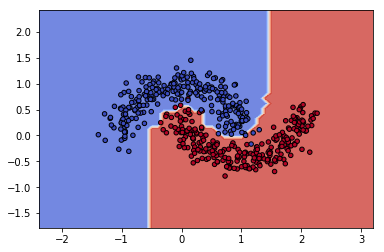

In [6]:
lg_plot(rnd_clf)

In [7]:
#极端随机树

from sklearn.ensemble import ExtraTreesClassifier

ext_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
ext_clf.fit(X_train, y_train)
y_pred_ef = ext_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_ef))

0.968


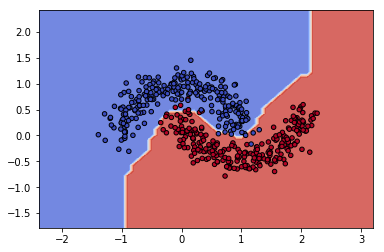

In [8]:
lg_plot(ext_clf)

In [9]:
# 特征重要性

from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.09405591078959766
sepal width (cm) 0.020508677873810967
petal length (cm) 0.4494299943752772
petal width (cm) 0.4360054169613144


In [10]:
# adaBoost

from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1),
        n_estimators=200,
        algorithm="SAMME.R",
        learning_rate=0.5
    )
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_ada))

0.96
